In [1]:
# Q1. Explain the basic concept of clustering and give examples of applications where clustering is useful.

Clustering is a type of unsupervised learning technique used in machine learning and data analysis to group a set of objects in such a way that objects in the same group (or cluster) are more similar to each other than to those in other groups. It's a method of identifying similar groups or patterns without prior knowledge of group definitions.

### Basic Concept:
Clustering algorithms seek to learn natural groupings in data by reducing distances between data points within the same cluster and maximizing the distance between different clusters. The goal is to find homogeneous subgroups within the larger set of heterogeneous data.

### Common Clustering Algorithms:
- **K-means Clustering**: Assigns data points to a predefined number of clusters (k) by minimizing the variance within each cluster. The center of a cluster is the mean of all points belonging to the cluster.
- **Hierarchical Clustering**: Builds a tree of clusters and doesn’t require a pre-specified number of clusters. It can be either agglomerative (bottom-up) or divisive (top-down).
- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Forms clusters based on dense areas of data points, which is great for data with irregular shapes and is robust to outliers.
- **Mean Shift**: A sliding-window-based algorithm that assigns the data points to the clusters iteratively by shifting this window towards the highest density of data points until convergence.

### Applications of Clustering:
1. **Market Segmentation**: Identifying distinct groups within a customer base to tailor marketing strategies according to different consumer profiles, improving engagement and response rates.
2. **Anomaly Detection**: Clustering can help in identifying unusual data points that do not fit into any group. This is useful in fraud detection, network security, and fault detection.
3. **Document Clustering**: Used in information retrieval to group similar documents for news aggregation, topic extraction, and organizing large databases of texts.
4. **Image Segmentation**: Used in digital image processing to group pixels into significant clusters, which simplifies the image and is used for image compression, editing, or enhancing specific features.
5. **Biological Data Analysis**: In bioinformatics, clustering is used to find groups of genes with similar expression patterns, which can indicate functional relationships or shared regulatory mechanisms.

Clustering has numerous other applications across various fields, including organizing computing clusters, city planning, earthquake studies, and astronomy for grouping stars based on similar characteristics. The effectiveness of clustering depends significantly on the definition of "distance" used in the function, which can vary as per the nature of the data and the desired clustering outcome.

In [2]:
# Q2. What is DBSCAN and how does it differ from other clustering algorithms such as k-means and
# hierarchical clustering?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm that is fundamentally different from algorithms such as k-means and hierarchical clustering due to its approach to defining clusters based on density rather than distance from a central point or hierarchical structure.

### Key Features of DBSCAN:
1. **Density-based**: The key concept behind DBSCAN is that a cluster is defined as a maximum set of density-connected points. It groups together points that are closely packed together, marking as outliers the points that lie alone in low-density regions.

2. **Doesn't require specifying the number of clusters**: Unlike k-means, DBSCAN does not require the user to specify the number of clusters beforehand. The algorithm determines the number of clusters based on the data, given two parameters: `eps` (epsilon) and `minPts` (minimum points).

3. **Handles noise**: DBSCAN can effectively handle noise and outliers, identifying and treating low-density areas as noise, which is not inherently managed by k-means or simple hierarchical clustering.

4. **Capable of finding arbitrarily shaped clusters**: DBSCAN can find clusters of any shape, unlike k-means, which assumes clusters are spherical. This makes DBSCAN suitable for complex geometrical data.

### Comparison with K-means and Hierarchical Clustering:

#### DBSCAN vs. K-means:
- **Cluster shape**: K-means clusters data into spherical shapes and is suitable for clusters where the mean is a meaningful center (homogenous variances). DBSCAN, however, can handle clusters of arbitrary shapes, making it more flexible for real-world data.
- **Sensitivity to outliers**: K-means is sensitive to outliers as outliers can skew the mean of a cluster significantly. DBSCAN treats outliers as noise, thereby enhancing the robustness of the clustering process.
- **Number of clusters**: K-means requires the number of clusters to be defined a priori, which can be a significant drawback if this information is not known. DBSCAN autonomously determines the number of clusters based on data density.

#### DBSCAN vs. Hierarchical Clustering:
- **Scalability**: Hierarchical clustering, especially agglomerative approaches, can be computationally expensive (often O(n^2) or O(n^3) time complexity) and not suitable for large datasets. DBSCAN generally offers better performance (O(n log n)) with appropriate indexing and is more feasible for larger datasets.
- **Ease of determination of clusters**: Hierarchical clustering results in a dendrogram, from which the analyst needs to interpret and cut at the right level to find meaningful clusters. DBSCAN directly delivers the set of clusters, marked by noise points, without the need for such interpretation.
- **Flexibility with cluster shapes**: Like DBSCAN, hierarchical clustering does not assume any particular shape of clusters, which is advantageous over k-means but often lacks the efficiency of DBSCAN in handling noise and determining cluster counts naturally.

DBSCAN is particularly useful in applications such as anomaly detection, spatial data analysis, and any domain requiring robustness to outliers and flexibility in terms of cluster shape. It's best suited for data with consistent density patterns and can struggle with data sets that have significant variations in density.

In [3]:
# Q3. How do you determine the optimal values for the epsilon and minimum points parameters in DBSCAN
# clustering?

Determining the optimal values for the epsilon (`eps`) and minimum points (`minPts`) parameters in DBSCAN is crucial for effective clustering results. These parameters significantly influence the number and shape of the clusters, as well as the classification of noise points. Here are some approaches and considerations for selecting these parameters:

### 1. **Choosing `minPts`**:
- **General guideline**: A common starting point for `minPts` is based on the dimensionality of the dataset. A minimum value of `minPts` can be set to `D + 1` where `D` is the number of dimensions of the dataset. A more conservative approach often used is `2*D`. For many practical applications, particularly for low-dimensional data, `minPts` is often chosen between 3 and 4.
- **Based on the data type**: If you expect some noise in your data, increasing `minPts` may help in defining more significant clusters and reducing the noise impact.

### 2. **Determining `eps`**:
Determining `eps` is more complex and can be approached in several ways:

#### a. **Nearest Neighbor Plot**:
- **k-distance Graph**: Plot the distance to the `k`-th nearest neighbor for each point in the dataset, sorted by distance. The value of `k` should ideally be the same as `minPts`. The plot typically shows a sharp bend or "elbow point," where the graph starts to rise steeply. This point indicates a suitable `eps` value, suggesting a natural gap in the data density.
  
#### b. **Grid Search with Evaluation Metrics**:
- **Silhouette Score**: Perform a grid search over a range of `eps` and `minPts` values and evaluate the resulting clusters using metrics such as the Silhouette Score, which measures how similar an object is to its own cluster compared to other clusters.
- **Cluster Stability**: You can repeatedly sample the dataset, apply DBSCAN, and measure the stability of the resulting clusters over different `eps` values to find the most stable configuration.

#### c. **Domain Knowledge**:
- Understanding the domain and the scale of measurement of the data can provide useful insights into reasonable `eps` values. For instance, if clustering geographical data with coordinates in latitudes and longitudes, knowledge about typical distances in these metrics can guide `eps`.

### 3. **Visual Inspection and Iterative Testing**:
- After setting initial values based on the above methods, visualize the clustering results to check for coherence and adjust the parameters iteratively based on the analysis of the outputs.

### 4. **Automated Methods**:
- Some recent approaches and tools can automatically determine these parameters or at least provide a reasonable starting point. These include methods based on density-based clustering validation or enhancements to DBSCAN like OPTICS (Ordering Points To Identify the Clustering Structure), which extends DBSCAN by eliminating the need to specify an exact `eps` value.

Selecting the right parameters for DBSCAN typically involves a combination of these methods, balancing computational efficiency with the accuracy and relevance of the clustering outcomes according to specific needs of the analysis or application.

In [4]:
# Q4. How does DBSCAN clustering handle outliers in a dataset?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is particularly well-known for its capability to identify and handle outliers effectively within a dataset. The algorithm's inherent design allows it to separate core areas of high density from sparse regions, which are typically where outliers are found. Here’s how it achieves this:

### Core, Border, and Noise Points:
DBSCAN categorizes points into three types based on the density criteria specified by the `eps` (epsilon) and `minPts` (minimum points) parameters:
1. **Core Points**: A point is considered a core point if it has at least `minPts` points within its `eps` neighborhood (including itself). These points are at the heart of a cluster, indicating a high-density region.
2. **Border Points**: These are points that are not core points but are within the `eps` neighborhood of a core point. While these points are part of a cluster, they do not meet the criteria to be core points because they have fewer than `minPts` neighbors within `eps`.
3. **Noise Points**: A point is considered noise or an outlier if it is neither a core point nor a border point. This classification occurs because these points do not have sufficient neighboring points to be considered part of a cluster, nor are they close enough to high-density areas to be included within a cluster.

### Process of Handling Outliers:
- **Detection**: During the clustering process, DBSCAN begins by identifying all core points based on the density parameters. It then attempts to expand clusters by recursively adding all density-reachable points from these core points. Points that cannot be reached and do not qualify as core or border points are classified as noise.
- **Classification**: Points identified as noise are generally treated as outliers and are not included in any clusters. In DBSCAN’s output, these points can be marked with a special label (often -1 or similar) indicating their status as outliers.
- **Impact on Clusters**: By effectively identifying and excluding outliers, DBSCAN helps in forming clusters that are more robust and representative of the underlying data structure, without being skewed by anomalies or unusual data points.

### Advantages of DBSCAN's Approach to Outliers:
- **Robustness**: DBSCAN’s method of treating low-density points as outliers makes it more robust to anomalies compared to clustering algorithms like k-means, which can be significantly affected by outliers.
- **Flexibility**: The flexibility in defining what constitutes an outlier (through `eps` and `minPts`) allows users to adjust the sensitivity of DBSCAN to outliers according to the specific context or domain of the data.

DBSCAN’s outlier detection capability makes it a preferred choice for datasets where identifying and handling outliers is crucial, such as in fraud detection, fault detection, and other areas where anomalies need to be separated from normal observations.

In [1]:
# Q5. How does DBSCAN clustering differ from k-means clustering?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) and k-means are two popular clustering algorithms used in data science, but they differ significantly in their methodologies, assumptions, and types of problems they are best suited to solve. Here's a detailed comparison of how these two algorithms differ:

### 1. **Algorithm Type**:
- **DBSCAN**: It is a density-based clustering algorithm. It groups together points that are closely packed together, marking as outliers the points that lie alone in low-density regions.
- **K-means**: It is a centroid-based clustering algorithm. It partitions the data into k clusters in which each point belongs to the cluster with the nearest mean, serving as a cluster center.

### 2. **Assumptions**:
- **DBSCAN**: Does not make any assumptions about the shapes of clusters, allowing it to find clusters of any arbitrary shape. It relies on a density-based notion of clusters which is great for complex spatial clusters.
- **K-means**: Assumes that clusters are spherical and isotropic, meaning they are equal in all directions, which often isn’t the case for real-world data. This assumption can lead to poor performance if natural clusters in the data have irregular shapes.

### 3. **Input Parameters**:
- **DBSCAN**: Requires two parameters: `eps` (the maximum distance between two samples for them to be considered as in the same neighborhood) and `minPts` (the minimum number of points required to form a dense region). The choice of these parameters can significantly influence the outcome and often requires domain knowledge or heuristic techniques.
- **K-means**: Requires the number of clusters to be specified beforehand, which can be a significant drawback if the number of clusters is not known in advance.

### 4. **Handling of Outliers**:
- **DBSCAN**: Naturally handles outliers by classifying low-density points as noise. This characteristic makes DBSCAN robust to outliers.
- **K-means**: Sensitive to outliers because a mean is easily skewed by extreme values. Outliers can disproportionately influence the position of the cluster centroid.

### 5. **Cluster Result**:
- **DBSCAN**: Produces a set of clusters that can vary in size. Clusters are defined by core and border points, with outliers identified and excluded from any cluster.
- **K-means**: Aims to partition the data into as many (assumed to be) equal-variance clusters as specified by the parameter k. Each cluster is defined strictly by its centroid with all points in a cluster being closer to its own centroid than to other cluster centroids.

### 6. **Scalability and Computational Complexity**:
- **DBSCAN**: Can be computationally expensive, especially for large datasets with a complexity of O(n^2) in the worst case, but it can be optimized to O(n log n) with spatial indexing.
- **K-means**: Generally faster and more scalable in practice, especially with algorithms such as the k-means++ for initialization and the Lloyd’s algorithm for optimization, though it too can struggle with very large datasets.

### 7. **Suitability**:
- **DBSCAN**: Best suited for data with clusters of similar density and does not require one to know the number of clusters beforehand. Ideal for applications like geographic data analysis where clusters may not be isotropic.
- **K-means**: Efficient for large datasets where clusters are roughly spherical and the number of clusters can be estimated beforehand. Often used in market segmentation, document clustering, and image segmentation.

In summary, the choice between DBSCAN and k-means should be driven by the nature of the problem, the shape and scale of the dataset, and the specific needs of the clustering, such as sensitivity to outliers and cluster shape.

In [2]:
# Q6. Can DBSCAN clustering be applied to datasets with high dimensional feature spaces? If so, what are
# some potential challenges?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) can technically be applied to datasets with high dimensional feature spaces, but there are several challenges and considerations that can affect its performance and effectiveness:

### 1. **Curse of Dimensionality**:
- **Distance Measure Sensitivity**: In high-dimensional spaces, the distance between any pair of points tends to become equidistant. This phenomenon affects DBSCAN because the core concept of the algorithm relies on the density estimate around each point within a specified radius (`eps`). If all points appear equidistant, distinguishing between dense and sparse regions becomes problematic.
- **Reduced Cluster Separability**: As dimensions increase, the contrast between different density regions can diminish, making it harder to define meaningful clusters based on density.

### 2. **Parameter Selection**:
- **Choosing `eps` Becomes Challenging**: In higher dimensions, it becomes increasingly difficult to choose an appropriate value for `eps` because the distance metrics can behave differently as dimensions grow. An `eps` value that is too small might lead to many points being considered noise, whereas an `eps` that is too large may merge distinct clusters.
- **`minPts` Adjustment**: The minimum number of points (`minPts`) required to form a dense region may need to be higher in a high-dimensional space to get a statistically significant estimate of density.

### 3. **Computational Complexity**:
- **Increased Processing Time**: DBSCAN’s complexity can escalate with the number of dimensions. Although it can be optimized to O(n log n) with spatial indexing (like KD-trees or R-trees), these indexing methods themselves become less effective and efficient in high dimensions.

### 4. **Sparsity of Data**:
- **Handling Sparse Data**: Data in high-dimensional spaces tend to be sparse, and sparse data can make it difficult for DBSCAN to find dense regions, as the average density decreases with increasing dimensionality.

### Possible Approaches to Mitigate Challenges:
1. **Dimensionality Reduction**: Techniques such as PCA (Principal Component Analysis), t-SNE, or autoencoders can be used to reduce the dimensionality of the dataset while preserving its intrinsic structure as much as possible before applying DBSCAN.
2. **Feature Selection**: Instead of using all features, select a subset of relevant features that contribute most to the variance or clustering structure.
3. **Scaling and Normalization**: Properly scaling and normalizing the data can help mitigate some of the issues related to distance measurement in higher dimensions.
4. **Enhanced Distance Metrics**: Experimenting with different distance metrics (like Manhattan distance for higher dimensions) might provide better performance than the conventional Euclidean distance.
5. **Using Improved or Alternative Algorithms**: Algorithms like OPTICS (Ordering Points To Identify the Clustering Structure) or HDBSCAN (Hierarchical DBSCAN) are extensions of DBSCAN designed to handle varying densities and may inherently perform better in higher-dimensional spaces.

In conclusion, while DBSCAN can be applied to high-dimensional datasets, the challenges associated with such applications are non-trivial and require careful handling of both the data and the parameters of the algorithm.

In [3]:
# Q7. How does DBSCAN clustering handle clusters with varying densities?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is primarily designed to identify clusters based on density, but it can face challenges when dealing with datasets where clusters vary significantly in their density. Here’s how DBSCAN handles clusters with varying densities and some of the limitations it may encounter:

### Handling of Clusters with Varying Densities:
1. **Core, Border, and Noise Points**: DBSCAN classifies points as core, border, or noise based on the parameters `eps` (epsilon) and `minPts` (minimum points):
   - **Core Points**: These have at least `minPts` within an `eps` radius and are considered the "dense" parts of a cluster.
   - **Border Points**: These are within the `eps` radius of a core point but do not themselves meet the criteria to be core points.
   - **Noise Points**: Points that do not meet either criterion and are typically in low-density regions.

2. **Density Connectivity**: DBSCAN relies on the concept of density-reachability and density-connectivity to form clusters. A point is density-reachable from another if it can be connected through a chain of points, each within the `eps` distance of the next and having at least `minPts` within their neighborhoods. This method allows DBSCAN to expand clusters from core points outwards, capturing border points that might be less dense but still part of a cluster.

### Challenges with Varying Densities:
1. **Parameter Sensitivity**: The biggest challenge with DBSCAN in handling varying density clusters comes from its sensitivity to the parameters `eps` and `minPts`:
   - If `eps` and `minPts` are set based on the denser regions, sparser clusters may not be detected, as there may not be enough points within the `eps` radius to meet the `minPts` criterion.
   - Conversely, if these parameters are set to detect sparser clusters, then denser clusters may be merged together, or noise points may be included in clusters.

2. **Uniform Density Assumption**: DBSCAN tends to assume a uniform density across clusters, which can lead to fragmented clusters or missed clusters if densities vary significantly across the dataset.

### Solutions and Alternatives:
1. **Adaptive DBSCAN**: Some variants of DBSCAN have been proposed where `eps` and `minPts` can adapt based on local densities. These adaptations aim to better handle data with clusters of varying densities by adjusting the criteria for defining core points dynamically.

2. **Using OPTICS**: OPTICS (Ordering Points To Identify the Clustering Structure) is an algorithm closely related to DBSCAN that creates an augmented ordering of the dataset representing its density-based clustering structure. This ordering helps in identifying clusters of varying densities without the need for a single `eps` value.

3. **HDBSCAN**: Hierarchical DBSCAN (HDBSCAN) builds upon DBSCAN by converting it into a hierarchical clustering algorithm, and then using a technique to extract flat clusters based on the stability of clusters over different scales. This method is particularly effective at handling varying densities by examining clusters across different `eps` values.

In summary, while standard DBSCAN may struggle with clusters of varying densities due to its fixed parameters, there are advanced techniques and alternative algorithms that offer more flexibility and better performance for such datasets.

In [1]:
# Q8. What are some common evaluation metrics used to assess the quality of DBSCAN clustering results?

Evaluating the quality of clustering results from DBSCAN (Density-Based Spatial Clustering of Applications with Noise) can be challenging, particularly because it does not require the number of clusters to be specified in advance, and it handles outliers as part of its process. Nevertheless, several common evaluation metrics can be used to assess the performance of DBSCAN clustering:

### 1. **Silhouette Score**
- **Description**: The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to 1, where a high value indicates that objects are well matched to their own cluster and poorly matched to neighboring clusters.
- **Application**: Useful for evaluating the definition and separation of clusters formed by DBSCAN. It helps to assess whether the chosen `eps` and `minPts` parameters lead to a meaningful clustering structure.

### 2. **Davies-Bouldin Index**
- **Description**: This index is defined as the average 'similarity' between each cluster and the cluster most similar to it, where similarity is a measure that compares the distance between clusters with the size of the clusters themselves. A lower Davies-Bouldin Index indicates a better partitioning.
- **Application**: It is particularly useful for algorithms like DBSCAN that might produce clusters of varying densities and sizes because it inherently evaluates the compactness and separation of the clusters.

### 3. **Dunn Index**
- **Description**: This index is the ratio of the smallest distance between observations not in the same cluster to the largest intra-cluster distance. A higher Dunn Index indicates a better clustering configuration, with greater inter-cluster separation relative to the intra-cluster distances.
- **Application**: Can be beneficial for assessing the results of DBSCAN, especially to confirm that the `eps` parameter is neither too large (causing overlap) nor too small (causing fragmentation).

### 4. **Adjusted Rand Index (ARI)**
- **Description**: Measures the similarity between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
- **Application**: ARI requires knowledge of the true cluster labels and is thus mainly used in synthetic or semi-supervised scenarios where true cluster assignments are known. It is perfect for validating the performance of DBSCAN against a ground truth.

### 5. **Normalized Mutual Information (NMI)**
- **Description**: A normalization of the Mutual Information (MI) score to scale the results between 0 (no mutual information) and 1 (perfect correlation). It measures the amount of information one can obtain about one cluster by observing another cluster.
- **Application**: Like ARI, NMI is useful when the true cluster labels are known, making it suitable for benchmarking DBSCAN in controlled experiments.

### 6. **Cluster Validity Indices (e.g., Calinski-Harabasz Index)**
- **Description**: These indices evaluate clusters by considering the ratio of between-clusters dispersion and within-cluster dispersion. Higher values generally indicate that the clusters are dense and well-separated, which is desirable in clustering.
- **Application**: These indices can be used to optimize the selection of `eps` and `minPts` in DBSCAN, ensuring that the resulting clusters maximize internal cohesion and external separation.

When using these metrics, particularly those like Silhouette Score, Davies-Bouldin Index, and Dunn Index, it's crucial to consider the nature of DBSCAN and its sensitivity to the parameters. Sometimes, visual assessment and domain-specific criteria are also important in confirming the practical usefulness of the clusters formed by DBSCAN.

In [2]:
# Q9. Can DBSCAN clustering be used for semi-supervised learning tasks?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is primarily an unsupervised learning algorithm designed to identify intrinsic structures in unlabeled data by grouping similar data points into clusters and distinguishing noise or outliers. However, it can be adapted or used in conjunction with other methods for semi-supervised learning tasks. Here’s how:

### 1. **Semi-Supervised Clustering**:
- **Clustering as Feature**: DBSCAN can be employed to discover clusters in the data which can then be used as new features or labels in a semi-supervised learning model. For instance, the cluster labels generated by DBSCAN can serve as inputs or augmentations to a supervised model, providing additional context or grouping information that the model might leverage.

### 2. **Constraint-Based Clustering**:
- **Incorporating Prior Knowledge**: While DBSCAN does not natively support the inclusion of prior knowledge (such as must-link or cannot-link constraints that are often used in semi-supervised clustering), modifications or extensions of DBSCAN, like Constrained DBSCAN (C-DBSCAN), allow incorporating such constraints. These constraints can guide the clustering process to adhere to known labels or relationships, making it more suitable for semi-supervised tasks.

### 3. **Label Propagation**:
- **Hybrid Approach**: After clustering with DBSCAN, one can apply label propagation techniques where a few labeled examples are available. Labels from labeled data can be propagated to unlabeled points within the same cluster, assuming that points in the same cluster are likely to share the same label. This approach leverages the density-based clusters formed by DBSCAN to enhance the label assignment process in semi-supervised learning.

### 4. **Active Learning**:
- **Cluster-Based Sampling**: DBSCAN can be used in an active learning framework where the clusters identified by DBSCAN inform the sampling strategy. For example, representative samples from diverse clusters (especially those clusters not confidently assigned) can be selected for manual labeling. This strategy can effectively reduce the labeling effort by ensuring that the samples chosen for labeling are those that will provide the most informational gain.

### 5. **Improving Supervised Algorithms**:
- **Pre-Training**: Clusters identified by DBSCAN might help in pre-training stages of supervised learning models. The structural insights gained from DBSCAN could be used to initialize parameters or to fine-tune the models, thereby improving the learning process when labeled data is sparse.

### Considerations and Limitations:
While DBSCAN can be adapted for use in semi-supervised learning, there are a few considerations:
- **Parameter Sensitivity**: The effectiveness of DBSCAN in semi-supervised tasks can still be highly sensitive to the choice of its parameters (`eps` and `minPts`), which may affect the quality and utility of the clusters it produces.
- **Scalability and Dimensionality**: Like in unsupervised scenarios, DBSCAN's performance and scalability can be challenged by large high-dimensional datasets.

In summary, while DBSCAN is inherently an unsupervised method, its applications can extend into semi-supervised learning through creative adaptations and integrations with other machine learning techniques. These applications exploit the natural clustering capabilities of DBSCAN to enrich the learning context where partial labels are available.

In [3]:
# Q10. How does DBSCAN clustering handle datasets with noise or missing values?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is designed to handle noise effectively, but its approach to missing values requires careful consideration. Here's how DBSCAN deals with each of these issues:

### Handling Noise:
DBSCAN inherently manages noise very well due to its core methodology:
1. **Noise Identification**: DBSCAN identifies noise as part of its operational process. Points that do not meet the criteria to be either core or border points are classified as noise. This classification is based on the parameters `eps` (epsilon) and `minPts` (minimum points):
   - **Core Points**: These are points that have at least `minPts` other points within their `eps` radius and are considered to be inside a dense region.
   - **Border Points**: These points are in the neighborhood of a core point but do not have enough points within their own `eps` radius to be considered core points.
   - **Noise Points**: Points that are neither core nor border points are considered noise. They are typically in low-density areas where the criteria for either core or border status are not met.

DBSCAN's ability to distinguish between dense clusters and sparse noise makes it highly suitable for datasets that are expected to contain outliers or anomalies, as these noise points are naturally excluded from clusters.

### Handling Missing Values:
DBSCAN's treatment of missing values is not as straightforward as its handling of noise, and generally, it does not inherently manage missing data:
1. **Distance Calculations**: The primary challenge with missing values in DBSCAN (and most clustering algorithms) is that distance calculations (needed to determine the `eps` neighborhood) become problematic. Most distance metrics, like Euclidean distance, cannot be directly computed with missing values.
2. **Data Imputation**: Before applying DBSCAN, missing values often need to be handled explicitly through imputation or removal, depending on the nature of the data and the extent of the missingness:
   - **Imputation**: Techniques such as mean, median, mode imputation, or more sophisticated approaches like k-nearest neighbors (KNN) imputation can be used to fill in missing values. The choice of imputation method should ideally preserve the underlying distribution and relationships in the data to prevent biases.
   - **Removal**: In cases where the proportion of missing data is minimal or if the missing data is not randomly distributed, it might be appropriate to simply exclude those data points from the dataset prior to clustering.

3. **Alternative Measures**: For datasets where imputation is not suitable, considering alternative distance measures or adaptations of DBSCAN that can handle missing data (such as using Gower distance for mixed data types) might be necessary.

In summary, DBSCAN excels in handling noise by effectively identifying and excluding noisy data points from the clusters formed. However, dealing with missing values requires preprocessing steps such as imputation, as DBSCAN does not inherently handle missing data. Preprocessing choices should be made carefully to avoid introducing biases that could affect the clustering results.

In [4]:
# Q11. Implement the DBSCAN algorithm using a python programming language, and apply it to a sample
# dataset. Discuss the clustering results and interpret the meaning of the obtained clusters.

In [5]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [7]:
X,label_true=make_moons(n_samples=300, noise=0.1, random_state=42)
X=StandardScaler().fit_transform(X)

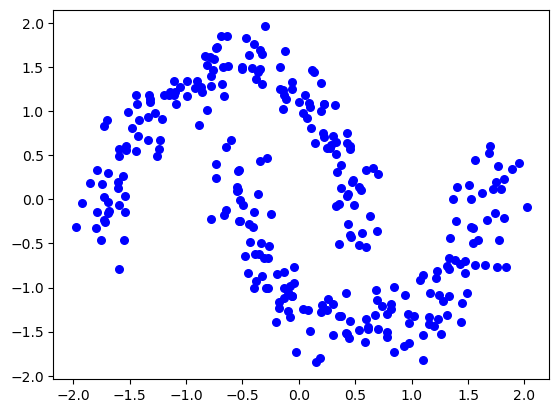

In [8]:
plt.scatter(X[:,0], X[:,1], s=30,color='blue')

In [9]:
#apply DBSCAN

In [10]:
from sklearn.cluster import DBSCAN

In [11]:
dbscan=DBSCAN(eps=0.3,min_samples=10)
cluster=dbscan.fit_predict(X)

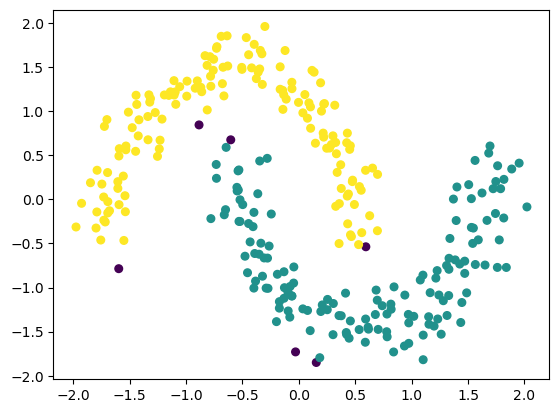

In [12]:
plt.scatter(X[:,0], X[:,1], s=30,c=cluster)